# Analysis approval on "loan intent" factor.

In [24]:
import os
import sys

In [25]:
DATASET_TRAIN = os.path.join("..", "..", "extracted_data", "train.csv")
DATASET_TEST = os.path.join("..", "..", "extracted_data", "test.csv")

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing dataset

In [27]:
df_train = pd.read_csv(DATASET_TRAIN)
df_test = pd.read_csv(DATASET_TEST)

Describing the dataset

In [28]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [30]:
df_train.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [31]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [32]:
df_train = df_train.drop(['id'], axis=1).reset_index()

### approved loan category

- 0 -> Not approved 
- 1 -> Approved

### Approved loan 

In [40]:
df_approved_load = df_train[df_train['loan_status'] == 1]
df_approved_load.head(3)

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
11,11,22,33000,RENT,6.0,PERSONAL,B,10000,11.12,0.30,N,2,1
24,24,22,30000,RENT,3.0,MEDICAL,D,5000,16.49,0.17,N,4,1
25,25,25,25000,RENT,3.0,VENTURE,C,3500,13.49,0.14,Y,3,1


In [43]:
loan_intent = df_approved_load['loan_intent'].value_counts()

Plotting the "loan indent" data.

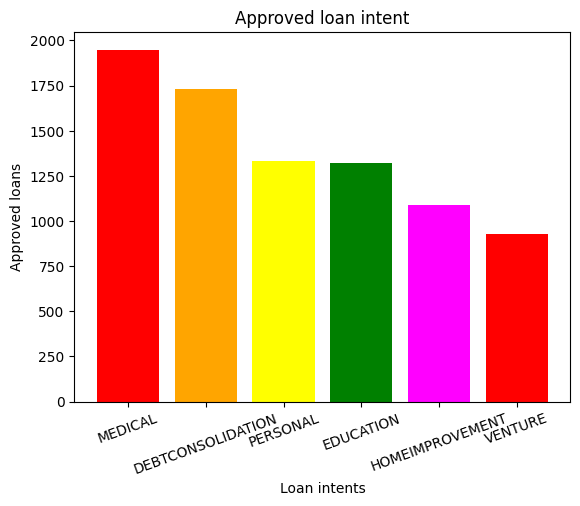

In [51]:
fig, ax = plt.subplots()
ax.bar(loan_intent.index.to_list(), loan_intent.values, color=['red', 'orange', 'yellow', 'green', 'magenta'])
plt.ylabel("Approved loans")
plt.xlabel("Loan intents")
plt.xticks(rotation=20)
plt.title("Approved loan intent")
plt.show()

The most approved loan is to cover **medical expenses**.

### Unapproved loan

In [53]:
df_unapproved_loan = df_train[df_train['loan_status'] == 0]

In [56]:
df_unapproved_loan.head(3)

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0


In [54]:
unapproved_loan = df_unapproved_loan['loan_intent'].value_counts()
unapproved_loan

loan_intent
EDUCATION            10949
VENTURE               9082
MEDICAL               8985
PERSONAL              8686
DEBTCONSOLIDATION     7404
HOMEIMPROVEMENT       5189
Name: count, dtype: int64

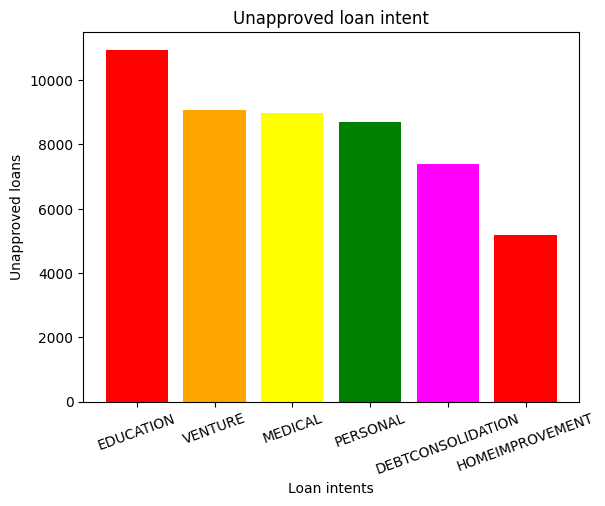

In [55]:
fig, ax = plt.subplots()
ax.bar(unapproved_loan.index.to_list(), unapproved_loan.values, color=['red', 'orange', 'yellow', 'green', 'magenta'])
plt.ylabel("Unapproved loans")
plt.xlabel("Loan intents")
plt.xticks(rotation=20)
plt.title("Unapproved loan intent")
plt.show()

Most of unapproved loan are from education sector. Whereas Medical loan which are highly approved loans are averagly rejected.

Lets check the difference between approved medical loans and unapproved medical loans.

In [71]:
df_medical_loan = df_train[df_train['loan_intent'] == "MEDICAL"].reset_index().drop(['level_0', 'index'], axis=1)
df_medical_loan


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
1,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
2,29,33000,OWN,8.0,MEDICAL,A,7300,8.90,0.23,N,8,0
3,29,60000,OWN,13.0,MEDICAL,A,15000,6.62,0.25,N,9,0
4,22,30000,RENT,3.0,MEDICAL,D,5000,16.49,0.17,N,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10929,29,200000,MORTGAGE,1.0,MEDICAL,A,12000,8.07,0.06,N,6,0
10930,44,76000,RENT,0.0,MEDICAL,C,14000,13.16,0.18,Y,13,0
10931,21,24000,RENT,5.0,MEDICAL,C,10000,13.85,0.42,N,4,1
10932,35,30000,RENT,6.0,MEDICAL,A,3000,6.62,0.10,N,8,0


In [83]:
df_medical_loan[df_medical_loan['loan_status'] == 1].reset_index()[['loan_amnt', 'loan_int_rate']]

,loan_amnt,loan_int_rate
0,5000,16.49
1,12500,11.71
2,8000,8.90
3,10000,16.40
4,14125,9.91
...,...,...
1944,13475,17.99
1945,10000,15.58
1946,10000,13.49
1947,10000,13.85


In [80]:
df_medical_loan[df_medical_loan['loan_status'] == 0].reset_index()[['loan_amnt', 'loan_int_rate']]

,loan_amnt,loan_int_rate
0,4000,13.35
1,6000,6.92
2,7300,8.90
3,15000,6.62
4,10000,8.59
...,...,...
8980,3000,7.74
8981,17000,8.49
8982,12000,8.07
8983,14000,13.16


### Total loan requests

In [37]:
total_loan_count = df_train['loan_intent'].value_counts()
total_loan_count

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64